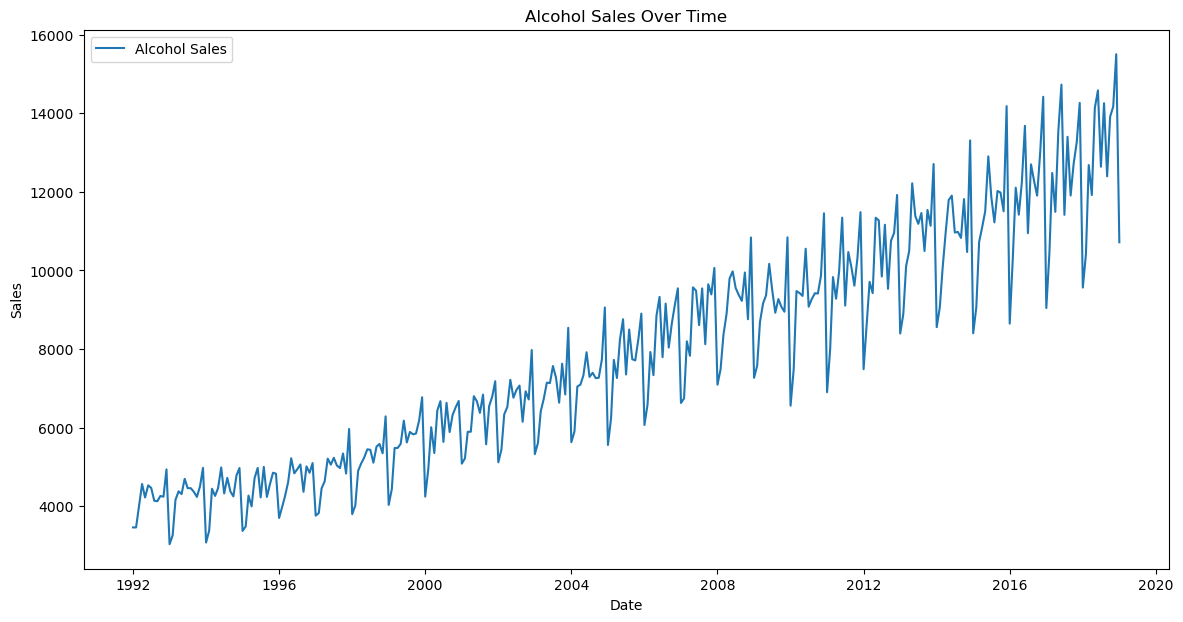

Forecast for Alcohol Sales:
2019-02-01    12853.505511
2019-03-01    13014.782838
2019-04-01    13026.962800
2019-05-01    13027.882653
2019-06-01    13027.952122
2019-07-01    13027.957369
2019-08-01    13027.957765
2019-09-01    13027.957795
2019-10-01    13027.957797
2019-11-01    13027.957797
2019-12-01    13027.957797
2020-01-01    13027.957797
Freq: MS, Name: predicted_mean, dtype: float64

RMSE for Alcohol Sales: 1487.7305112559059
MAE for Alcohol Sales: 1300.8715147721093



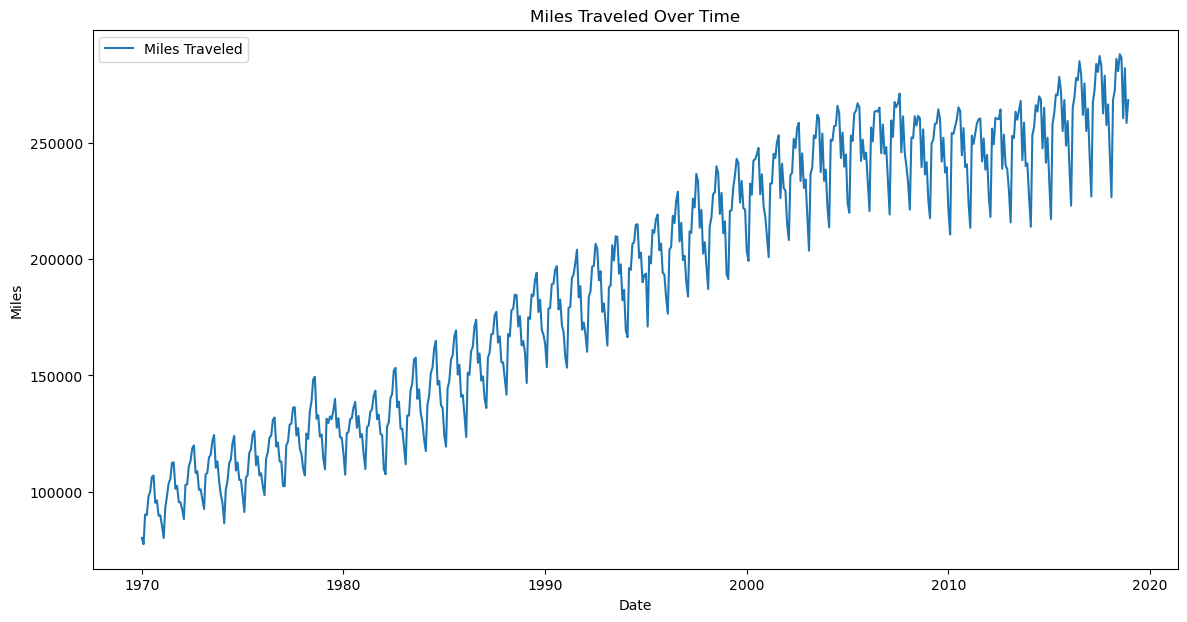

Forecast for Miles Traveled:
2019-01-01    264832.719964
2019-02-01    266321.918875
2019-03-01    265702.494312
2019-04-01    265960.140746
2019-05-01    265852.974048
2019-06-01    265897.549481
2019-07-01    265879.008561
2019-08-01    265886.720560
2019-09-01    265883.512794
2019-10-01    265884.847048
2019-11-01    265884.292072
2019-12-01    265884.522911
Freq: MS, Name: predicted_mean, dtype: float64

RMSE for Miles Traveled: 18038.03929060074
MAE for Miles Traveled: 14814.18216982105


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load data
alcohol_data = pd.read_csv('Alcohol_Sales.csv')

# Convert Date column to datetime and set as index
alcohol_data['DATE'] = pd.to_datetime(alcohol_data['DATE'])
alcohol_data.set_index('DATE', inplace=True)
alcohol_data.index.freq = 'MS'  # Set frequency to Month Start (MS)

# Plot alcohol sales data
plt.figure(figsize=(14, 7))
plt.plot(alcohol_data['S4248SM144NCEN'], label='Alcohol Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Alcohol Sales Over Time')
plt.legend()
plt.show()

# Define ARIMA model for alcohol sales
def arima_forecast(data):
    model = ARIMA(data, order=(1, 1, 1))  # Example order, tune as needed
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=12)  # Forecasting next 12 steps (months)
    return forecast

# Forecast alcohol sales using ARIMA
alcohol_forecast = arima_forecast(alcohol_data['S4248SM144NCEN'])
print("Forecast for Alcohol Sales:")
print(alcohol_forecast)
print()

# Evaluate alcohol sales forecast
def evaluate_forecast(actual, forecast):
    actual_values = actual[-12:].values  # Use the last 12 months for evaluation
    forecast_values = forecast[-12:]  # Forecast for the next 12 months
    rmse = np.sqrt(mean_squared_error(actual_values, forecast_values))
    mae = mean_absolute_error(actual_values, forecast_values)
    return rmse, mae

# Example for evaluating Alcohol Sales forecast
rmse_alcohol, mae_alcohol = evaluate_forecast(alcohol_data['S4248SM144NCEN'], alcohol_forecast)
print(f"RMSE for Alcohol Sales: {rmse_alcohol}")
print(f"MAE for Alcohol Sales: {mae_alcohol}")
print()

# Load miles traveled data
miles_data = pd.read_csv('Miles_Traveled.csv')

# Convert Date column to datetime and set as index
miles_data['DATE'] = pd.to_datetime(miles_data['DATE'])
miles_data.set_index('DATE', inplace=True)
miles_data.index.freq = 'MS'  # Set frequency to Month Start (MS)

# Plot miles traveled data
plt.figure(figsize=(14, 7))
plt.plot(miles_data['TRFVOLUSM227NFWA'], label='Miles Traveled')
plt.xlabel('Date')
plt.ylabel('Miles')
plt.title('Miles Traveled Over Time')
plt.legend()
plt.show()

# Define ARIMA model for miles traveled
miles_forecast = arima_forecast(miles_data['TRFVOLUSM227NFWA'])
print("Forecast for Miles Traveled:")
print(miles_forecast)
print()

# Evaluate miles traveled forecast
rmse_miles, mae_miles = evaluate_forecast(miles_data['TRFVOLUSM227NFWA'], miles_forecast)
print(f"RMSE for Miles Traveled: {rmse_miles}")
print(f"MAE for Miles Traveled: {mae_miles}")
